<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Portfolio_Diversification_Analysis_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Simulate daily returns for each asset class (250 trading days, assuming 1 year)
num_days = 250
num_assets = 4  # stocks, bonds, commodities, real estate
asset_classes = ["Stocks", "Bonds", "Commodities", "Real Estate"]

# Generate random returns for each asset class (mean return and volatility)
mean_returns = [0.0008, 0.0002, 0.0005, 0.0003]  # daily mean returns for each asset class
volatility = [0.02, 0.01, 0.015, 0.012]  # daily volatility for each asset class

# Simulate daily returns
returns = np.array([np.random.normal(mean, vol, num_days) for mean, vol in zip(mean_returns, volatility)]).T
returns_df = pd.DataFrame(returns, columns=asset_classes)

print("Synthetic Returns Data (first 5 rows):\n", returns_df.head())


Synthetic Returns Data (first 5 rows):
      Stocks     Bonds  Commodities  Real Estate
0  0.010734 -0.012409     0.014393    -0.010779
1 -0.001965  0.009379     0.029141    -0.015920
2  0.013754  0.021422    -0.020479    -0.011410
3  0.031261  0.010525     0.008945     0.012944
4 -0.003883 -0.014994    -0.009260    -0.011093


In [2]:
# Calculate annualized volatility (Standard Deviation)
volatility_annual = returns_df.std() * np.sqrt(252)

# Calculate Value at Risk (VaR) at 95% confidence interval
VaR_95 = returns_df.quantile(0.05)

# Correlation Matrix
correlation_matrix = returns_df.corr()

print("Annualized Volatility:\n", volatility_annual)
print("\nValue at Risk (VaR) 95%:\n", VaR_95)
print("\nCorrelation Matrix:\n", correlation_matrix)


Annualized Volatility:
 Stocks         0.306713
Bonds          0.158439
Commodities    0.235591
Real Estate    0.182533
dtype: float64

Value at Risk (VaR) 95%:
 Stocks        -0.029170
Bonds         -0.014975
Commodities   -0.024970
Real Estate   -0.016591
Name: 0.05, dtype: float64

Correlation Matrix:
                Stocks     Bonds  Commodities  Real Estate
Stocks       1.000000 -0.017186     0.027215     0.038900
Bonds       -0.017186  1.000000     0.050055    -0.181296
Commodities  0.027215  0.050055     1.000000    -0.052686
Real Estate  0.038900 -0.181296    -0.052686     1.000000


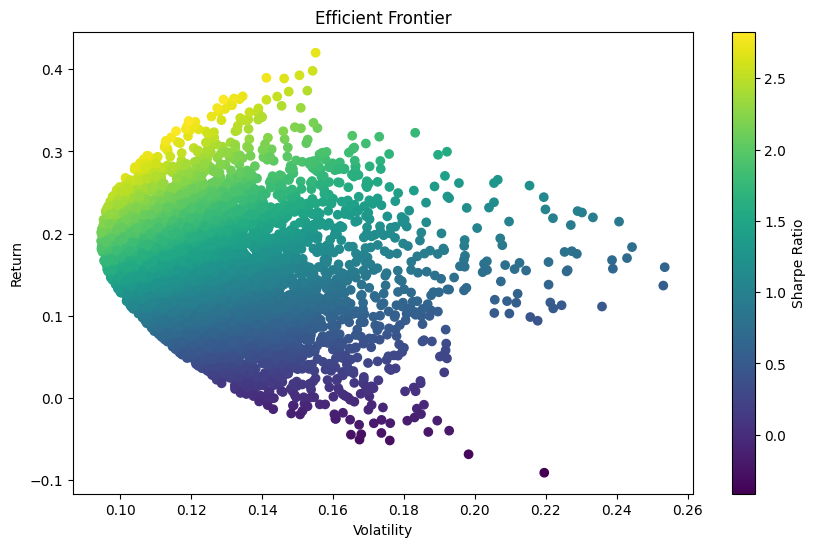

In [3]:
# Calculate expected returns and covariance matrix
expected_returns = returns_df.mean() * 252  # annualized expected return
cov_matrix = returns_df.cov() * 252  # annualized covariance matrix

# Number of portfolios to simulate
num_portfolios = 5000
results = np.zeros((3 + num_assets, num_portfolios))  # Return, Volatility, Sharpe Ratio + weights

for i in range(num_portfolios):
    # Randomly assign weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    # Portfolio metrics
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility

    # Save results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio
    results[3:, i] = weights

# Convert results array to DataFrame
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Sharpe Ratio"] + asset_classes)

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results_df["Volatility"], results_df["Return"], c=results_df["Sharpe Ratio"], cmap="viridis")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient Frontier")
plt.show()


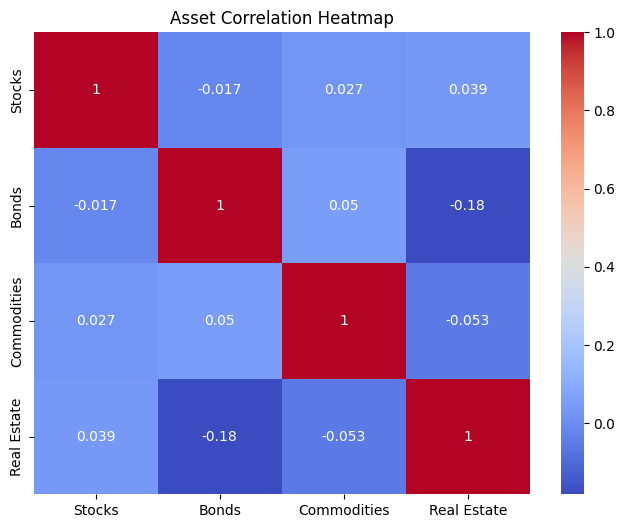

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Asset Correlation Heatmap")
plt.show()
